In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
ad = pd.read_csv('advertising.csv')

In [4]:
#analysing the dataset
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#Checking the shape of the dataset
ad.shape

(200, 4)

In [6]:
#Checking the null values
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#Checking the summary of the dataset
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


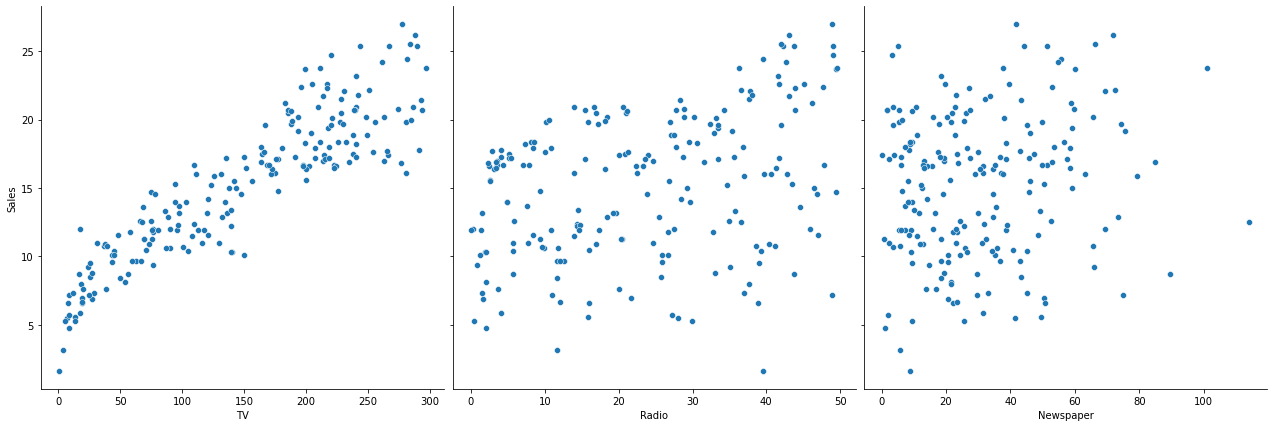

In [8]:
#Checking the co-relation between predictors and target variables using scatter plot/pairplot
sns.pairplot(data=ad, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 6, kind = 'scatter')
plt.show()

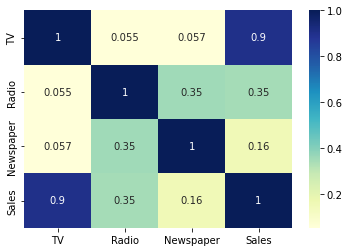

In [9]:
#Checking the co-relation between predictors and target variables using heatmap
sns.heatmap(ad.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [10]:
#Importing more libraries
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [11]:
#Creating X and y
X = ad['TV']
y = ad['Sales']

In [12]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state=100)

In [13]:
X_train.shape

(140,)

In [14]:
#training the model using statsmodels
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [15]:
#fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [16]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.52e-52
Time:                        22:08:22   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
y_train_pred = lr_model.predict(X_train_sm)

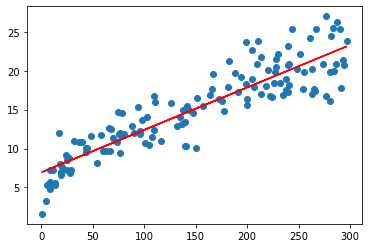

In [18]:
#prediction
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

## Step-3: Residual Analysis

In [19]:
res = y_train - y_train_pred

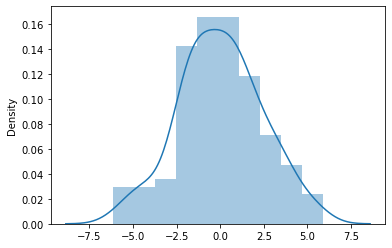

In [20]:
#Checking the distribution of residuals
plt.figure
sns.distplot(res)
plt.show()

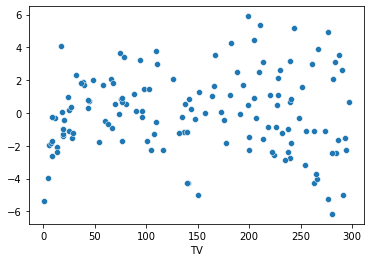

In [21]:
#Looking for patterns in residuals
sns.scatterplot(X_train, res)
plt.show()

## 4. Prediction and Evaluation on the Test Set

In [22]:
#Adding the constant in the test set
X_test_sm = sm.add_constant(X_test)

In [23]:
#Predicting on the test set
y_test_pred = lr_model.predict(X_test_sm)

In [24]:
#Importing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
#Evaluating the model, r-squared on the test
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [26]:
#mean_squared_error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

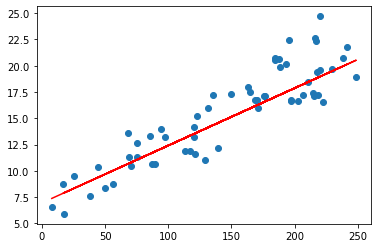

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Linear Regression using sklearn

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [43]:
X_test.shape

(60,)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
#Creating an object of linear regression
lm = LinearRegression()

In [46]:
#reshaping X_train into (n,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [47]:
X_train_lm.shape

(140, 1)

In [49]:
#Fitting the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [50]:
#Check the parameters
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [51]:
#Make predictions on train set and test set
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [52]:
#Evaluating the model
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
